## Documentation
---

Documentation to [numpy.split](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.split.html)

In [15]:
import numpy as np 
from scipy import misc
from scipy.misc import imsave
import matplotlib.pyplot as plt
import itertools
import tensorflow

In [2]:
## methods
## saves image 
# misc.imsave('face.png', f)

numpy array shape: (768, 1024, 3)


/Users/ahmedacheikh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


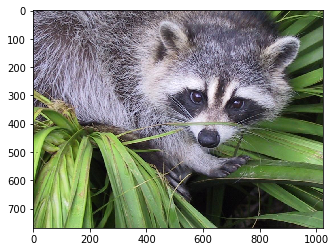

In [6]:
# reads image 
face = misc.imread('face.png')

# print object 
print(f"numpy array shape: {face.shape}")

plt.imshow(face)

In [10]:
# save file as .raw
# face.tofile('face.raw') # Create raw file

# read raw file 
face_from_raw = np.fromfile('face.raw', dtype=np.uint8)

# np array 
face_from_raw.shape

(2359296,)

In [20]:
### Step 1

## getting the nearest mutplier and resizing the imge 
# get x and y for the new shape
x = face.shape[0] - face.shape[0]%28
y = face.shape[1] - face.shape[1]%28

resized_image = face[0:x, 0:y,:]

# print original image shape 
print(f"original image's shape: {face.shape}")

# print resized image's shape 
print(f"resized image's shape: {resized_image.shape}")

original image's shape: (768, 1024, 3)
resized image's shape: (756, 1008, 3)


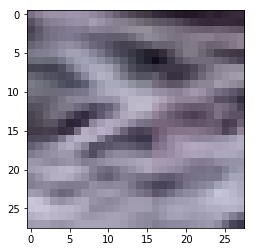

In [61]:
plt.imshow(resized_image[0:28, 0:28, :])

In [23]:
resized_image

array([[[121, 112, 131],
        [138, 129, 148],
        [153, 144, 165],
        ...,
        [132, 142, 107],
        [155, 162, 129],
        [172, 177, 145]],

       [[ 89,  82, 100],
        [110, 103, 121],
        [130, 122, 143],
        ...,
        [132, 142, 107],
        [152, 159, 126],
        [166, 171, 139]],

       [[ 73,  66,  84],
        [ 94,  87, 105],
        [115, 108, 126],
        ...,
        [130, 140, 103],
        [145, 152, 118],
        [156, 163, 129]],

       ...,

       [[124, 144,  91],
        [120, 140,  87],
        [120, 138,  86],
        ...,
        [110, 149,  96],
        [109, 148,  95],
        [108, 147,  94]],

       [[117, 140,  86],
        [118, 138,  87],
        [120, 140,  89],
        ...,
        [112, 151,  98],
        [110, 149,  96],
        [109, 148,  95]],

       [[115, 138,  86],
        [115, 138,  86],
        [119, 142,  90],
        ...,
        [113, 153, 100],
        [111, 151,  98],
        [110, 150,  97]]

In [196]:
### Step 2 

# number of times ndarray will be devided along axis 0
x_split = resized_image.shape[0]/28
print(x_split)

# number of times we will split along side axis 1
y_split = resized_image.shape[1]/28
print(y_split)

27.0
36.0


In [202]:
# possible number of arrays 
print(f"Number of possible images: {int(x_split * y_split)}")

Number of possible images: 972


Number of sections the image was divided to along axis0: 27
------------------------------------------------------------------------------------------
shape of one element: (28, 1008, 3)
------------------------------------------------------------------------------------------


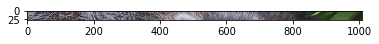

In [228]:
# splitting the resized image into 27 sections along side axis 0 or "rows"
test_axis0 = np.split(resized_image, indices_or_sections= x_split, axis=0)

print(f"Number of sections the image was divided to along axis0: {len(test_axis0)}")
print("---"*30)
print(f"shape of one element: {test_axis0[0].shape}")
print("---"*30)

# using pyplot's plt and imshow to plot section 1 of the 27 sections the imaged was resized to 
plt.imshow(test_axis0[1])

Len/Number of sections the resized image was divided to along axis1: 36
------------------------------------------------------------------------------------------
shape of one those sections/image: (756, 28, 3)
------------------------------------------------------------------------------------------


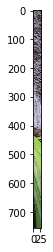

In [222]:
### Step 3

# splitting the resized image into 36 sections along side axis 1 or "columns"
test_axis1 = np.split(resized_image, indices_or_sections = y_split, axis=1)

print(f"Len/Number of sections the resized image was divided to along axis1: {len(test_axis1)}")
print("---"*30)
print(f"shape of one those sections/image: {test_axis1[0].shape}")
print("---"*30)


# using pyplot and imshow to plot section 10 of the sections the imaged was resized to 
plt.imshow(test_axis1[10])

shape of an image in this section: (28, 28, 3)
------------------------------------------------------------------------------------------
In this one section there are 27 images
------------------------------------------------------------------------------------------


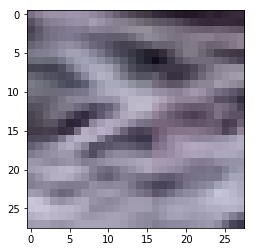

In [224]:
### Step 4 

# splitting one section of the 36 sections into 27 pictures
deep_cut = np.split(test_axis1[0], indices_or_sections=27, axis=0)

# show image 28 x 28 
plt.imshow(deep_cut[0])

# get the shape of the array
print(f"shape of an image in this section: {deep_cut[0].shape}")
print("---"*30)
print(f"In this one section there are {len(deep_cut)} images")
print("---"*30)

In [238]:
### buil a list of images, len should be equal to 36 and each element should have 27

# empty list to hold ndarray for each section 
images_list = []

# loop through the list of sections and split each section 27 times by axis 0 then append the result into the list
for i in test_axis1:
    images_list.append(np.split(i, indices_or_sections=27, axis=0))

In [239]:
# 36 is also the number of sections our initial resized image was divided into, 
# therefore, it is the length of this list as well 
print(f"length of images' list: {len(images_list)}")
print("---"*30)
print(f"Number of images in each element of the list: {len(images_list[0])}")

length of images' list: 36
------------------------------------------------------------------------------------------
Number of images in each element of the list: 27


In [245]:
# unpakcing each nested list 
image_list = list(itertools.chain(*images_list))

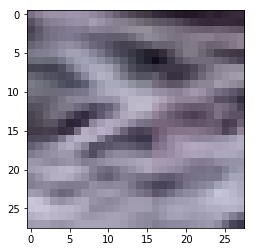

In [253]:
plt.imshow(image_list[0])

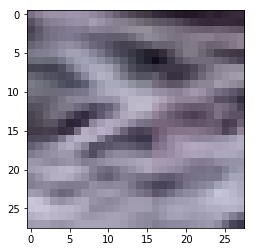

In [241]:
# check for nested image 
plt.imshow(images_list[0][0])

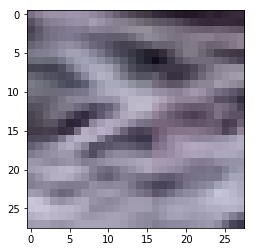

In [186]:
plt.imshow(test_axis0[0][:,:28,:])

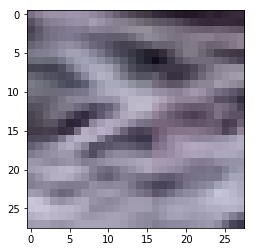

In [187]:
plt.imshow(test_axis1[0][:28,:,:])

In [50]:
# reads image 
image = misc.imread('parking_rice.png')

/Users/ahmedacheikh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


(300, 858, 4)

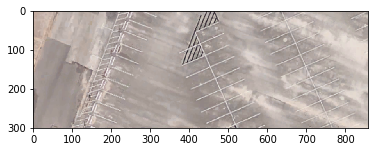

In [51]:
plt.imshow(image)
image.shape

Original image has a shape of: (300, 858, 4).
------------------------------------------------------------------------------------------
Resized image has a shape of: (280, 840, 4).
------------------------------------------------------------------------------------------
Number of resized 28 x 28 images: 300.
------------------------------------------------------------------------------------------
The resized image has been vertically divided into 30 segments.
------------------------------------------------------------------------------------------
The shape of one of those sections/images: (280, 28, 4).
------------------------------------------------------------------------------------------
Each of these segments has been divided 10.0 times to create 28 x 28 image.
------------------------------------------------------------------------------------------
Done! Below is a 28x28 image from the top left corner of our resized image


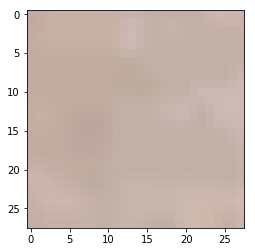

In [52]:
## getting the nearest 28 mutplier and resizing the imge 
# get x and y for the new shape
x = image.shape[0] - image.shape[0]%28
y = image.shape[1] - image.shape[1]%28

# resized would start from zero and stop at the highest multiplier of 28 closest to original dimensions
resized_image = image[0:x, 0:y,:]

# print original image shape 
print(f"Original image has a shape of: {image.shape}.")
print("---"*30)
# print resized image's shape 
print(f"Resized image has a shape of: {resized_image.shape}.")
print("---"*30)

# number of sections we will get by splitting along side axis 0 or 'Horizontal', x
horizontal_split = resized_image.shape[0] / 28


# number of sections we would get by splitting vertically, axis 1, y
vertical_split = resized_image.shape[1]/28

# the product of the two gives us, the final number of resized 28 x 28 images  
print(f"Number of resized 28 x 28 images: {int(horizontal_split * vertical_split)}.")
print("---"*30)

# splitting the resized image along side axis 1 (i.e column or vertical split)
vertical_images = np.split(resized_image, indices_or_sections = vertical_split, axis=1)

print(f"The resized image has been vertically divided into {len(vertical_images)} segments.")
print("---"*30)
print(f"The shape of one of those sections/images: {vertical_images[0].shape}.")
print("---"*30)
print(f"Each of these segments has been divided {horizontal_split} times to create 28 x 28 image.")
print("---"*30)

# empty list to hold ndarray for each section/image
nested_list = []

# loop through vertical images and split each horizontally
for image in vertical_images:
    nested_list.append(np.split(image, indices_or_sections= horizontal_split, axis=0))
    
# unpakc the nest list to become a list of 3d numpy arrays 
image_list = list(itertools.chain(*nested_list))

print("Done! Below is a 28x28 image from the top left corner of our resized image")

# plot the 28 x 28 picture at the top left corner 
plt.imshow(image_list[0])

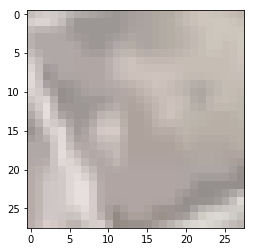

In [54]:
plt.imshow(image_list[255])

In [14]:
from keras.models import load_model
image_model = load_model("../models/deep_learning_sat6_cnn.h5")

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


In [11]:
model_loss, model_accuracy = image_model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

In [58]:
image_model.predict(x).round()

array([[0., 0., 0., 1., 0., 0.]], dtype=float32)

In [47]:
image_list[400].shape

(28, 28, 3)

In [56]:
x = image_list[255].reshape((-1,28,28,4))

In [57]:
image.shape

(280, 28, 4)